In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping



In [4]:
data = pd.read_csv('/Users/chris/Documents/Machine Vis. Proj/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [5]:
y = data['label']
x = data.drop(columns=['label'])

In [6]:
skin_data = pd.read_csv('/Users/chris/Documents/Machine Vis. Proj/HAM10000_metadata.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


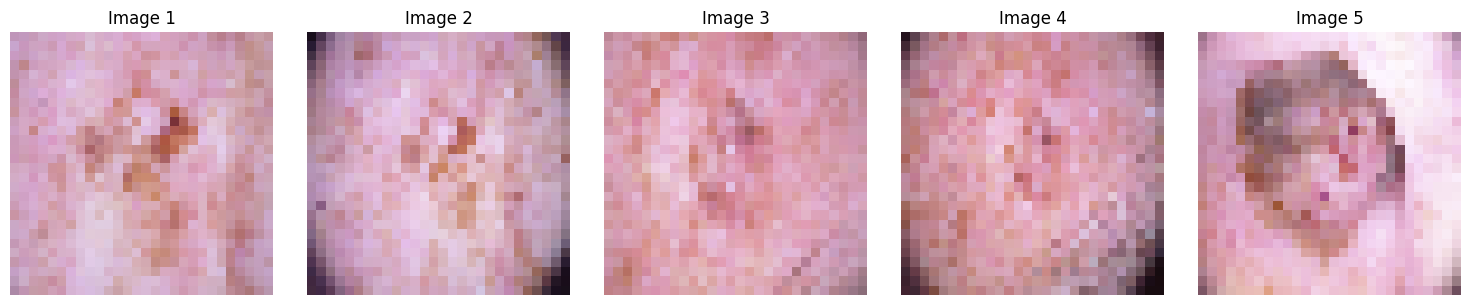

In [7]:
image_dir1 = '/Users/chris/Documents/Machine Vis. Proj/HAM10000_images_part_1'  
image_dir2 = '/Users/chris/Documents/Machine Vis. Proj/HAM10000_images_part_2' 

image_data = []
for image_id in skin_data['image_id']:
    image_path = os.path.join(image_dir1, image_id + '.jpg')
    if not os.path.exists(image_path):
        image_path = os.path.join(image_dir2, image_id + '.jpg')
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (28, 28))
    image_data.append(image)

image_data = np.array(image_data)

plt.figure(figsize=(15, 3)) 
for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.imshow(image_data[i])
    plt.axis('off') 
    plt.title(f"Image {i+1}")  
plt.tight_layout() 
plt.show()




In [8]:
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma')
}

In [9]:
x = (x - np.mean(x)) / np.std(x)  
image_data = image_data / 255.0  
image_data_flattened = image_data.reshape(image_data.shape[0], -1)
x = np.concatenate([x, image_data_flattened], axis=1)

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


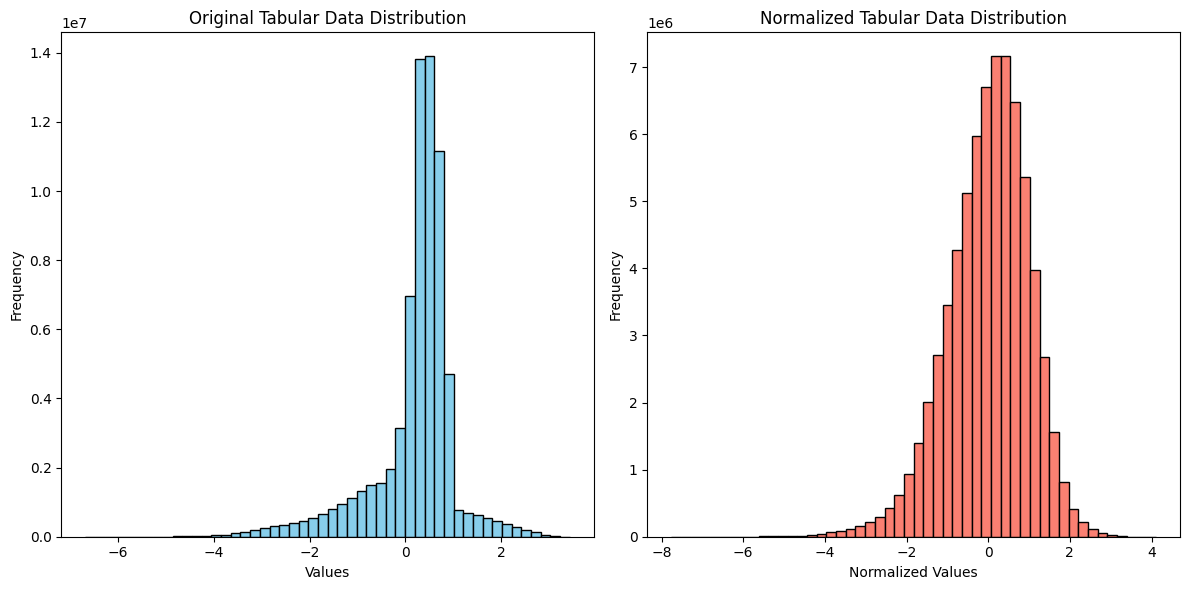

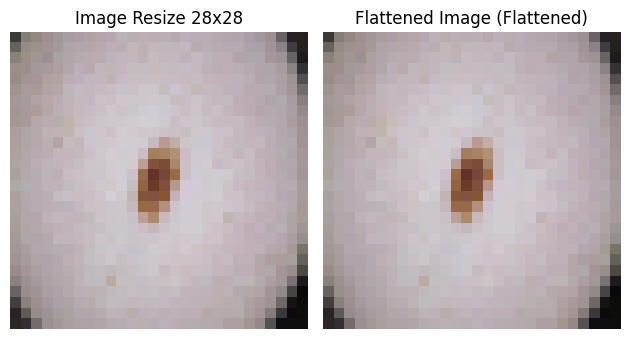

In [ ]:
#plt.figure(figsize=(12, 6))

#plt.subplot(1, 2, 1)
#plt.hist(x.flatten(), bins=50, color='skyblue', edgecolor='black')
#plt.title("Original Tabular Data Distribution")
#plt.xlabel("Values")
#plt.ylabel("Frequency")

#x_normalized = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
#plt.subplot(1, 2, 2)
#plt.hist(x_normalized.flatten(), bins=50, color='salmon', edgecolor='black')
#plt.title("Normalized Tabular Data Distribution")
#plt.xlabel("Normalized Values")
#plt.ylabel("Frequency")

#plt.tight_layout()
#plt.show()


#random_image_idx = np.random.randint(0, len(image_data))

#image_flattened = image_data_flattened[random_image_idx]
#image_original_shape = image_data[random_image_idx].reshape(28, 28, 3) 


#plt.subplot(1, 2, 1)
#plt.imshow(image_original_shape)
#plt.title("Image Resize 28x28")
#plt.axis('off')


#plt.subplot(1, 2, 2)
#plt.imshow(image_flattened.reshape(28, 28, 3))  # Reshaped flattened image
#plt.title("Flattened Image (Flattened)")
#plt.axis('off')

#plt.tight_layout()
#plt.show()




In [20]:
#print(f"x shape: {x.shape}")
#print(f"y shape: {y.shape}")


x shape: (100, 10)
y shape: (10015,)


In [ ]:
#min_samples = min(len(x), len(y))
#x = x[:min_samples]
#y = y[:min_samples]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

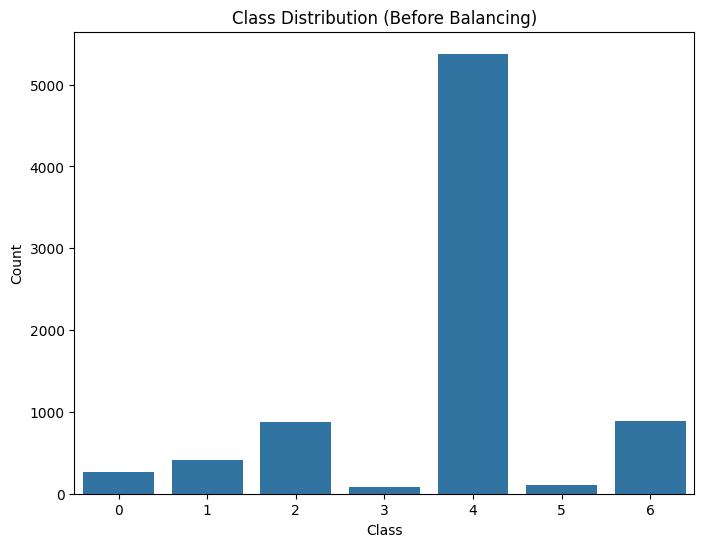

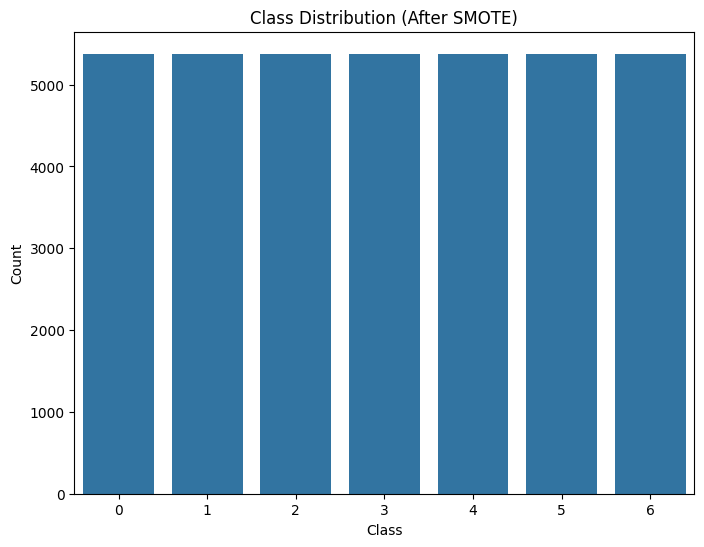

In [ ]:
#plt.figure(figsize=(8, 6))
#sns.countplot(x=Y_train)
#plt.title("Class Distribution (Before Balancing)")
#plt.xlabel("Class")
#plt.ylabel("Count")
#plt.show()


#smote = SMOTE(sampling_strategy='auto', random_state=42) 
#X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
#plt.figure(figsize=(8, 6))
#sns.countplot(x=Y_train_resampled)
#plt.title("Class Distribution (After SMOTE)")
#plt.xlabel("Class")
#plt.ylabel("Count")
#plt.show()

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #loading in mnist data


# Flatten the images for SMOTE
X_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalize to [0, 1]
X_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0     # Normalize to [0, 1]

# SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_flattened, Y_train)


X_train_resampled = X_train_resampled.reshape(-1, 28, 28)

valid_indices_train = Y_train_resampled <= 6
X_train_resampled = X_train_resampled[valid_indices_train]
Y_train_resampled = Y_train_resampled[valid_indices_train]

valid_indices_test = Y_test <= 6
X_test_filtered = X_test_flattened[valid_indices_test].reshape(-1, 28, 28)  
Y_test_filtered = Y_test[valid_indices_test]


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28)), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,         
    restore_best_weights=True,  
    verbose=1            
)


history = model.fit(X_train_resampled, Y_train_resampled, 
                    validation_split=0.2, 
                    batch_size=128, 
                    epochs=20, 
                    callbacks=[early_stopping])




Epoch 1/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5122 - loss: 1.4113 - val_accuracy: 0.9159 - val_loss: 0.4260
Epoch 2/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8677 - loss: 0.4970 - val_accuracy: 0.9375 - val_loss: 0.2588
Epoch 3/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9003 - loss: 0.3550 - val_accuracy: 0.9514 - val_loss: 0.2001
Epoch 4/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9147 - loss: 0.2948 - val_accuracy: 0.9582 - val_loss: 0.1698
Epoch 5/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9231 - loss: 0.2631 - val_accuracy: 0.9623 - val_loss: 0.1517
Epoch 6/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9329 - loss: 0.2330 - val_accuracy: 0.9649 - val_loss: 0.1378
Epoch 7/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9386 - loss: 0.2153 - val_accuracy: 0.9677 - val_loss: 0.1271
Epoch 8/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9445 - loss: 0.1988 - val_accuracy: 0.

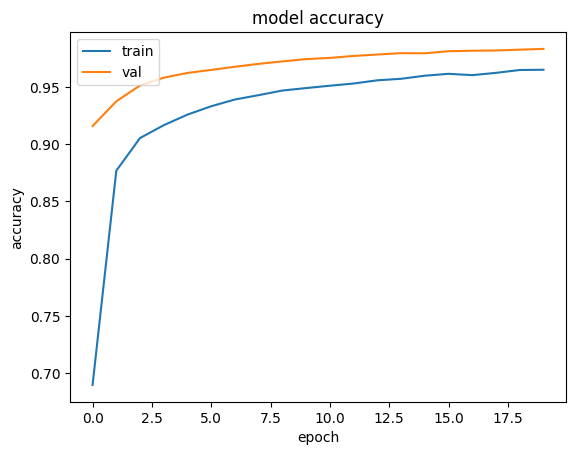

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


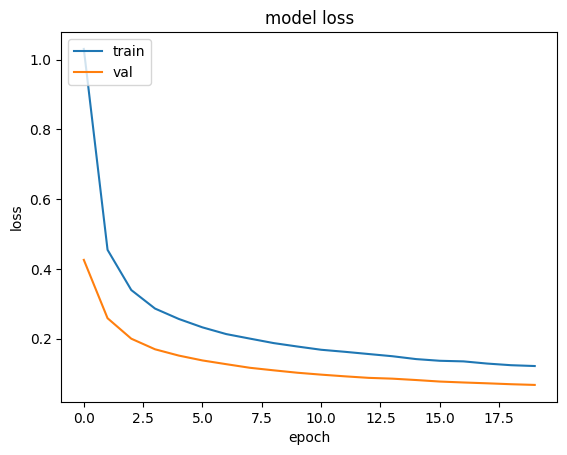

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


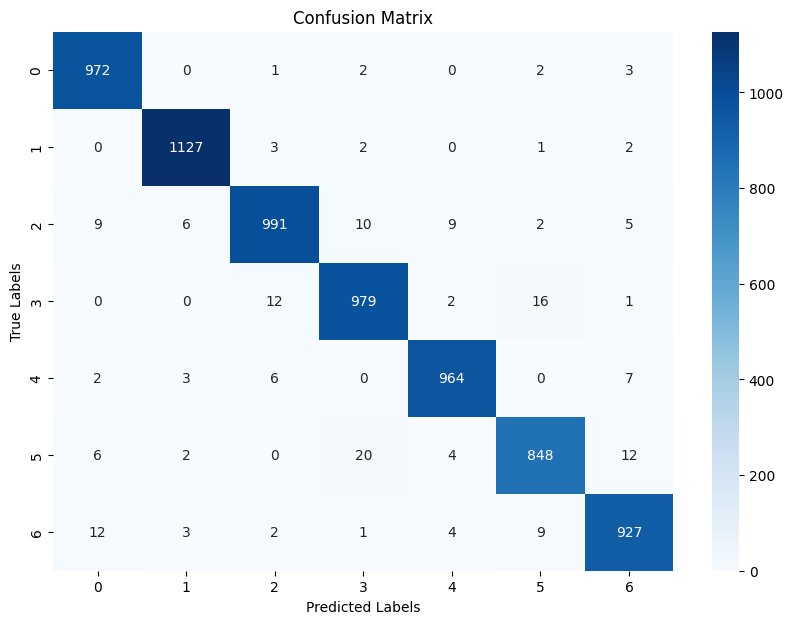

In [21]:
predictions = model.predict(X_test_filtered)
predicted_classes = np.argmax(predictions, axis=1)

con_matrix = confusion_matrix(Y_test_filtered, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(con_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


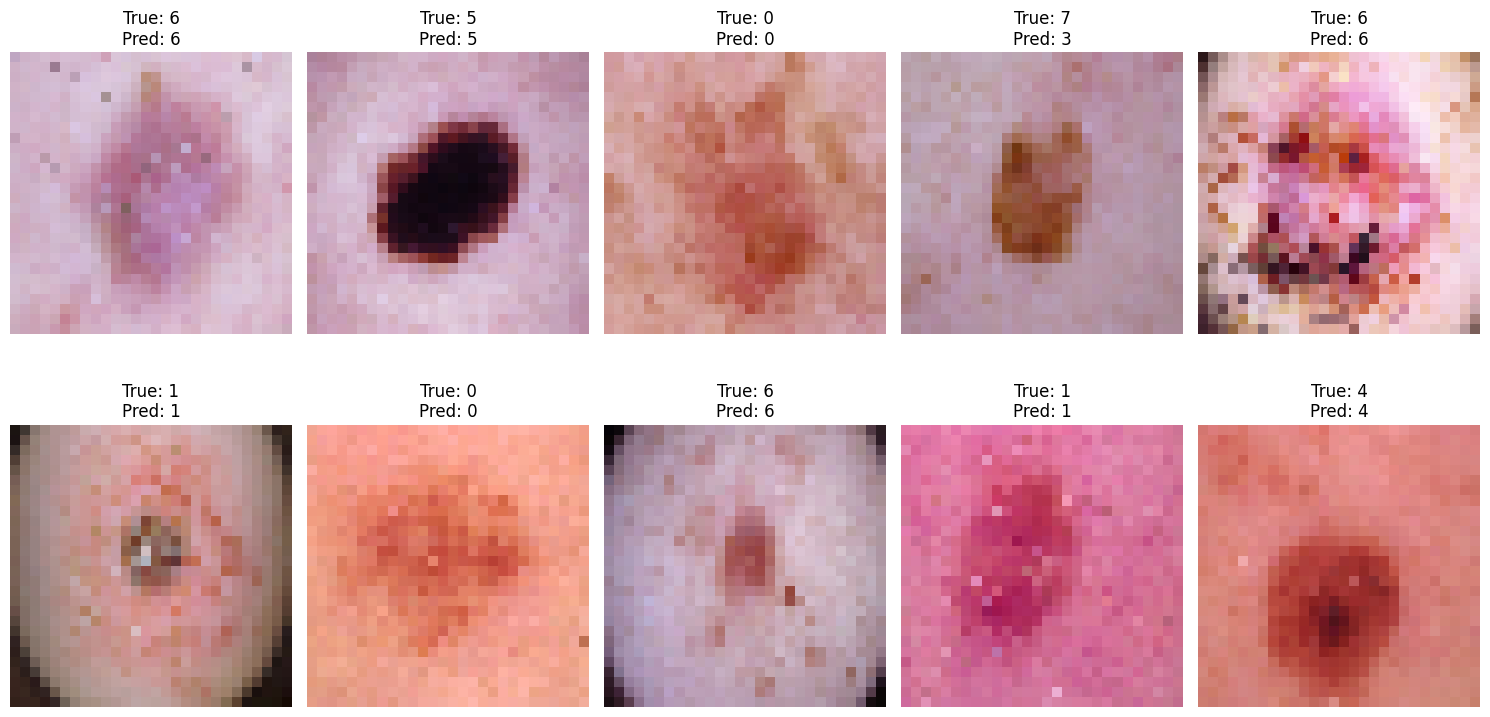

In [25]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


indices = np.random.choice(range(len(X_test)), size=10, replace=False)
sample_images = image_data[indices] 
true_labels = Y_test.iloc[indices].values if isinstance(Y_test, pd.Series) else Y_test[indices]
predicted_labels_sample = predicted_labels[indices]


plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])  
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels_sample[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
